In [2]:
%load_ext autoreload
%autoreload 2

from util import *
from all_bundle import algorithm


In [5]:
import os

problem_file = os.path.join("stage1_problems", 'STAGE1_2.json')
timelimit = 600

# np.random.seed(1)

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

alg_start_time = time.time()

exception = None

solution = None
try:
    # Run algorithm!
    solution = algorithm(K, ALL_ORDERS, ALL_RIDERS, DIST, timelimit)
except Exception as e:
    exception = f'{e}'


alg_end_time = time.time()

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time)

checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

checked_solution['time'] = alg_end_time - alg_start_time
checked_solution['timelimit_exception'] = (alg_end_time - alg_start_time) > timelimit + 1 # allowing additional 1 second!
checked_solution['exception'] = exception

checked_solution['prob_name'] = prob['name']
checked_solution['prob_file'] = problem_file

checked_solution

Best obj = 7244.27
Best obj = 7211.45
Best obj = 7168.72
Best obj = 7159.53
Best obj = 7137.5
Best obj = 7115.71
Best obj = 7108.09
Best obj = 7099.22
Best obj = 7064.18
Best obj = 7056.06
Best obj = 7030.33
Best obj = 6985.11
Best obj = 6932.0
Best obj = 6901.58
Best obj = 6868.73
Best obj = 6812.03
Best obj = 6804.27
Best obj = 6782.16
Best obj = 6740.39
Best obj = 6663.06
Best obj = 6608.93
Best obj = 6605.35
Best obj = 6548.42
Best obj = 6540.41
Best obj = 6531.83
Best obj = 6496.36
Best obj = 6483.51
Best obj = 6447.49
Best obj = 6438.78
Best obj = 6427.97
Best obj = 6370.18
Best obj = 6351.92
Best obj = 6332.27
Best obj = 6278.43
Best obj = 6239.67
Best obj = 6216.02
Best obj = 6157.25
Best obj = 6151.01
Best obj = 6115.15
Best obj = 6095.41
Best obj = 6081.76
Best obj = 6068.16
Best obj = 6044.14
Best obj = 6019.76
Best obj = 5974.71
Solution must be a list of bundle information!


{'feasible': False,
 'infeasibility': 'Solution must be a list of bundle information!',
 'bundles': None,
 'time': 15.404242038726807,
 'timelimit_exception': False,
 'exception': "'NoneType' object has no attribute 'rider'",
 'prob_name': 'STAGE1_2',
 'prob_file': 'stage1_problems/STAGE1_2.json'}

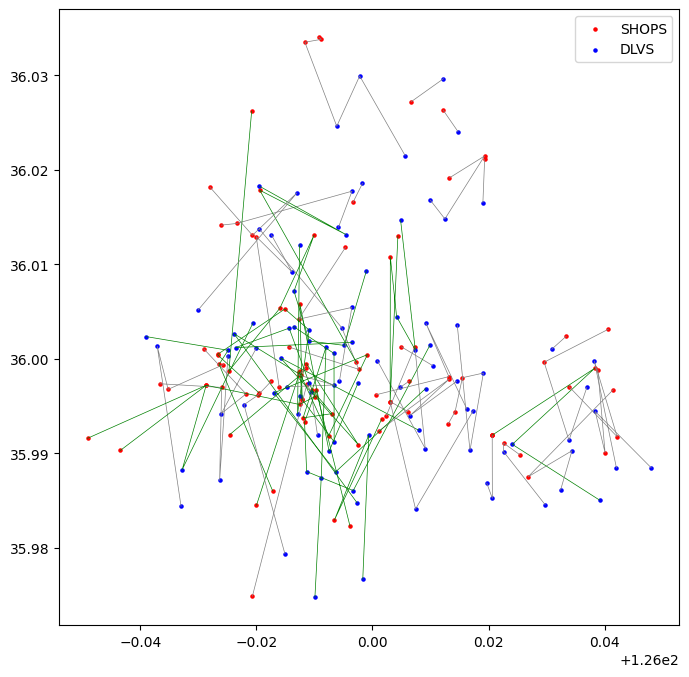

In [3]:
draw_route_solution(ALL_ORDERS, checked_solution)

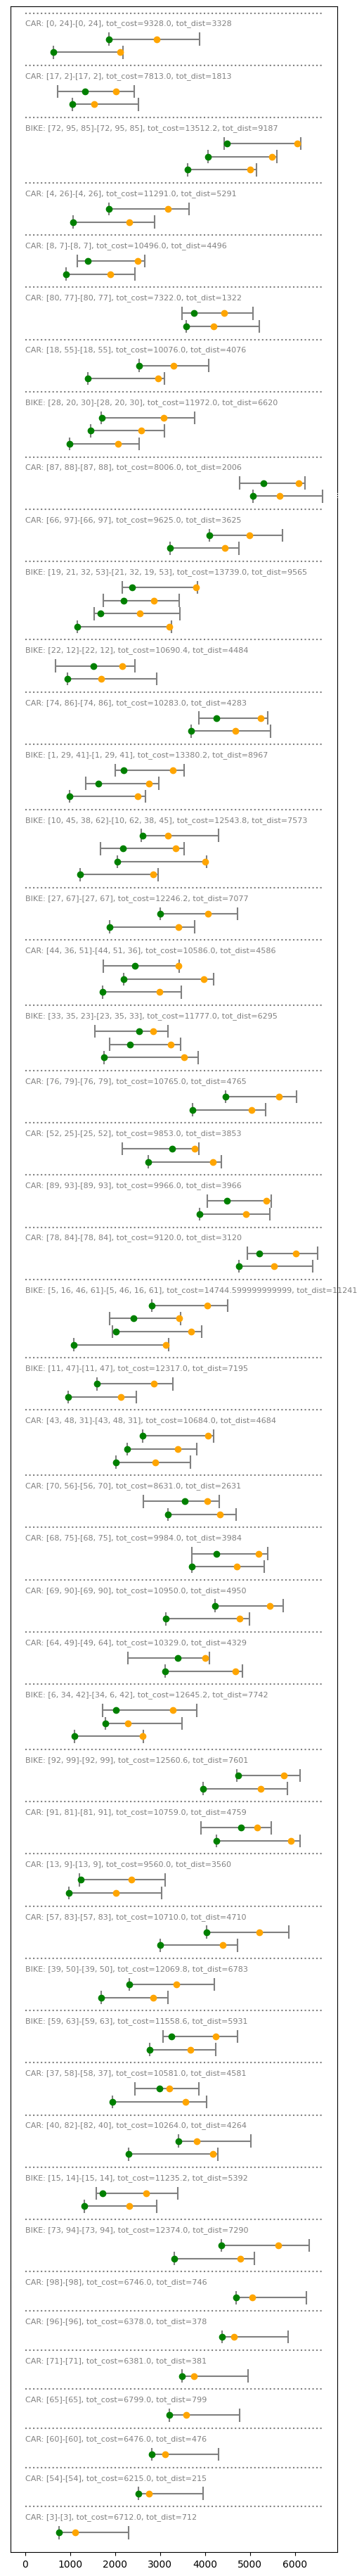

In [4]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)